In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml

In [31]:
mnist= tf.keras.datasets.mnist

In [32]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
mnist_df = pd.DataFrame(mnist.data)
mnist_df['label'] = mnist.target  

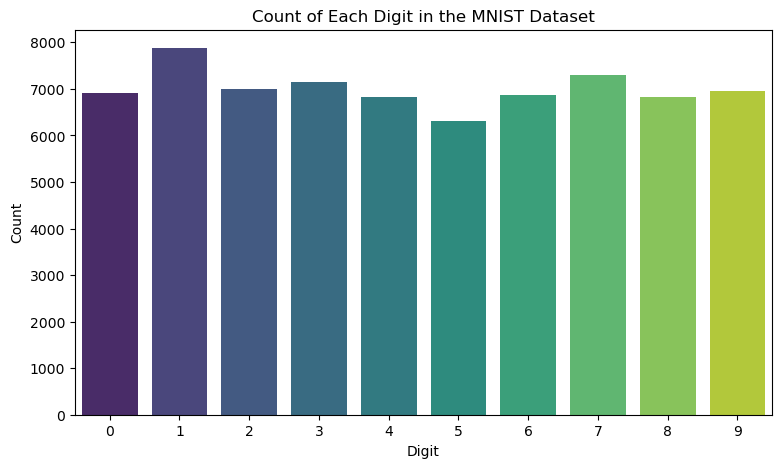

In [33]:
# Create the count plot
plt.figure(figsize=(9, 5))
sns.countplot(x='label', data=mnist_df, palette='viridis')
plt.title('Count of Each Digit in the MNIST Dataset')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show();

In [34]:
from sklearn.model_selection import train_test_split

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images (if using a fully connected network)
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

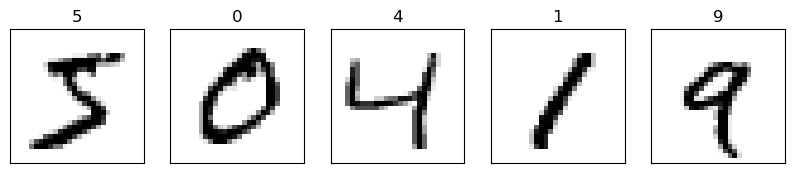

In [35]:
#Dataset properties
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten the input
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

C:\Users\honey\anaconda_new\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Reshape data for CNN (add the channel dimension)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

In [39]:
history = model.fit(x_train_cnn, y_train_cat, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.5718 - loss: 1.2397 - val_accuracy: 0.9117 - val_loss: 0.2938
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9108 - loss: 0.2879 - val_accuracy: 0.9450 - val_loss: 0.1891
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9474 - loss: 0.1745 - val_accuracy: 0.9596 - val_loss: 0.1308
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9628 - loss: 0.1202 - val_accuracy: 0.9668 - val_loss: 0.1108
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9708 - loss: 0.0952 - val_accuracy: 0.9707 - val_loss: 0.0984
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9748 - loss: 0.0792 - val_accuracy: 0.9737 - val_loss: 0.0845
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9771 - loss: 0.0735 - val_accuracy: 0.9753 - val_loss: 0.0830
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9793 - loss: 0

In [41]:
# Reshape test data for CNN
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Evaluate using reshaped test data
test_loss, test_acc = model.evaluate(x_test_cnn, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.0802


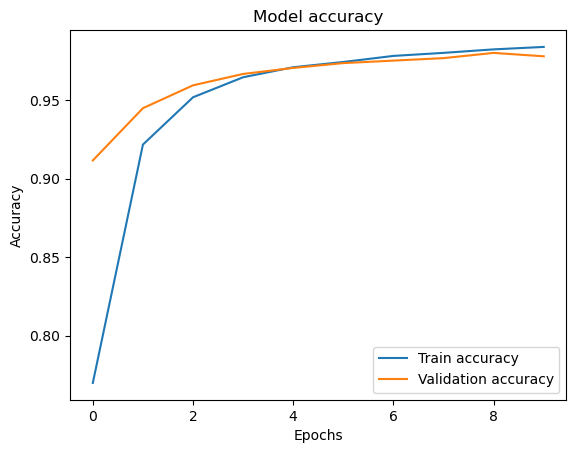

In [43]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [46]:
model.save('project.h5')

In [48]:
# Confusion Matrix
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    1,    0,    0,    1,    2,    2,    1,    0],
       [   0, 1132,    1,    0,    0,    0,    0,    1,    1,    0],
       [   1,    5, 1000,    8,    0,    0,    0,   15,    3,    0],
       [   0,    0,    0,  998,    0,    7,    0,    3,    2,    0],
       [   0,    2,    1,    0,  963,    0,    2,    4,    1,    9],
       [   1,    1,    0,    4,    0,  883,    1,    1,    1,    0],
       [   3,    3,    0,    1,    2,   10,  938,    0,    1,    0],
       [   1,    3,    4,    4,    0,    0,    0, 1012,    1,    3],
       [   5,    1,    5,   22,    2,    6,    0,    8,  923,    2],
       [   0,    7,    0,    8,    8,    5,    0,   12,    3,  966]])>

Text(95.72222222222221, 0.5, 'Truth')

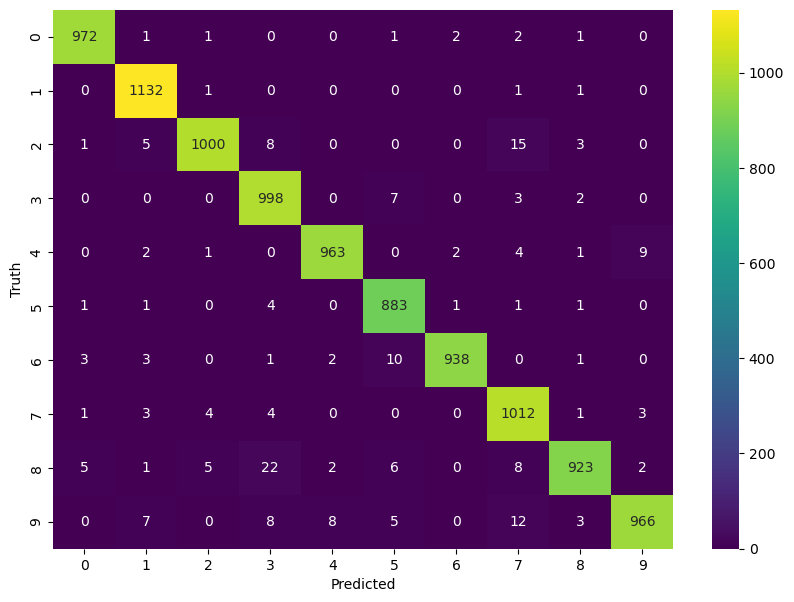

In [49]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted Value:  4
Successful prediction


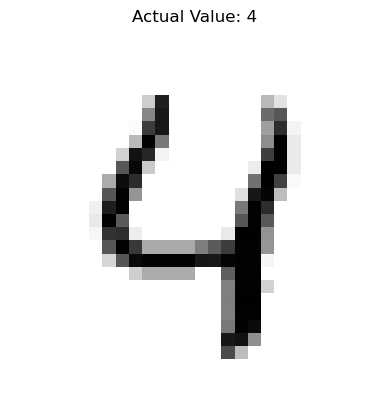

In [57]:
# Testing the Model
plt.imshow(x_test[4],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[4]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[4]))
if(y_test[4]==(np.argmax(prediction[4]))):
      print('Successful prediction')
else:
      print('Unsuccessful prediction')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted Value:  9
Successful prediction


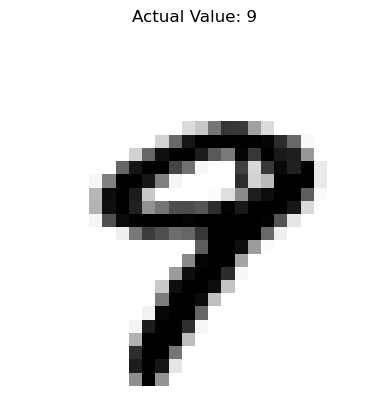

In [55]:
plt.imshow(x_test[9],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[9]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[9]))
if(y_test[9]==(np.argmax(prediction[9]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')